In [ ]:
%cd ..
from src.utils import plot_polygons, choose_evenly
from src.loss import shoelace_objective, iou_objective
from src.geometry import sort_clockwise

import torch
from IPython.display import clear_output

/home/ventus/spelldraw/spelldraw-shape-correction


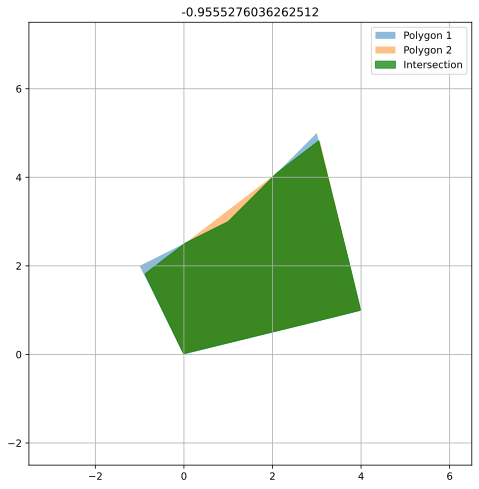

In [2]:
polygon1 = torch.tensor([
    (0,0),(4,1),(3,5),(1,3),(-1,2)
], dtype=torch.float32)
polygon2 = polygon1[[0, 2, 3, 4]].requires_grad_(True)
# polygon2 = choose_evenly(polygon1, 4).requires_grad_(True)

optimizer = torch.optim.Adam([polygon2], lr=0.1)

for i in range(200):
    optimizer.zero_grad()
    loss = -iou_objective(polygon1, polygon2)

    clear_output(wait=True)  # Clear output before plotting new frame

    plot_polygons(polygon1.detach(), polygon2.detach(), title=loss.item())
    
    loss.backward()
    optimizer.step()

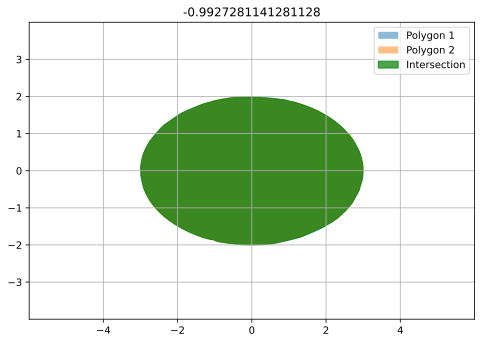

In [3]:
def ellipse_points(a, b, n):
    """Generate n points approximating an ellipse with semi-axes a and b."""
    t = torch.linspace(0, 2 * torch.pi, n)
    x = a * torch.cos(t)
    y = b * torch.sin(t)
    return torch.tensor(list(zip(x, y))[:-1])

polygon1 = ellipse_points(3, 2, 100)
polygon2 = (choose_evenly(polygon1, 50) + torch.normal(0, 1, (50, 2))).requires_grad_(True)

optimizer = torch.optim.Adam([polygon2], lr=0.1)
loss = torch.Tensor([0])

for i in range(200):
    clear_output(wait=True)  # Clear output before plotting new frame
    plot_polygons(polygon1.detach(), sort_clockwise(polygon2).detach(), title=loss.item())

    optimizer.zero_grad()
    loss = -iou_objective(polygon1, polygon2)

    loss.backward()
    optimizer.step()